<a href="https://colab.research.google.com/github/AshutoshKumarDubey/Regression_Capstone_Project_Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_By_Ashutosh_Kumar_Dubey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset and Loading

In [ ]:
#Importing all the required libraries that may be used in execution of the code to be written below:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor


from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PolynomialFeatures 
import warnings
warnings.filterwarnings('ignore'
)


In [ ]:
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive'
)


Mounted at /content/drive


In [ ]:
#Importing the dataset.
df=pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding = 'Latin')

# UNDERSTANDING THE DATASET

In [ ]:
#Let us check the number of rows and columns in the dataset.
df.shape

(8760, 14)

In [ ]:
#Seeing the first 5 rows of dataset to get an idea of features and values.
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Seeing the last 5 rows to gauge the outline of dataset.
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Checking the data type of different columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Getting a summary of the data to see the range of values of different features.
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Here we have an observation from the above description that 'Rented Bike Count','Visiblity' are the ones where there is considerable difference between the mean and median and we can say that these might have a skewed distribution.Otherwise, almost all the other do not have muchdifference.


# DATA CLEANUP

In [ ]:
# A check for the null/missing values.
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We find that there are no null values in the dataset.

In [ ]:
# Check for the duplicate values.
duplicate=df.duplicated().sum()

We find that there are no duplicate values in the dataset.

Extracting the usable value from Date column. Now, since it is object dtype, we need to convert it to date dtype so that we can extract numerous information for this date column only.

In [ ]:
# Converting date column dtype object to date.
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# Informative features extracted from the date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_week'] = df['Date'].dt.day_name()

The column "day", it contains the details about the each day of the month, for our relevence we don't need data for each day of each month  but we need the data which tells us if a day is a weekday or a weekend so we convert it into this format and drop the "day"column.


In [ ]:
# Creating a new column of 'weekend_or_not' by applying 'ONE-HOT-ENCODING' to make it usable fo the model.
df['weekend_or_not'] = np.where(df['Day_of_week'].isin(['Sunday', 'Saturday']),1,0)

In [ ]:
# Dropping the columns like DATE, and YEAR for the above stated reasons
df=df.drop(columns=['Date','Day_of_week','Year'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [ ]:
# Since 'hour','month' and ' weekend_or_not ' must be regarded as Categorical data therefore the type need to be changed
df[['Hour','Month','weekend_or_not']]=df[['Hour','Month','weekend_or_not']].astype('category')

In [ ]:
# Dividing Data in categorical and numerical features for better analysis -
numeric_features= df.select_dtypes(include=['int64','float64'])
categorical_features=df.select_dtypes(include=['category','object'])

# EXPLORATORY DATA ANALYSIS

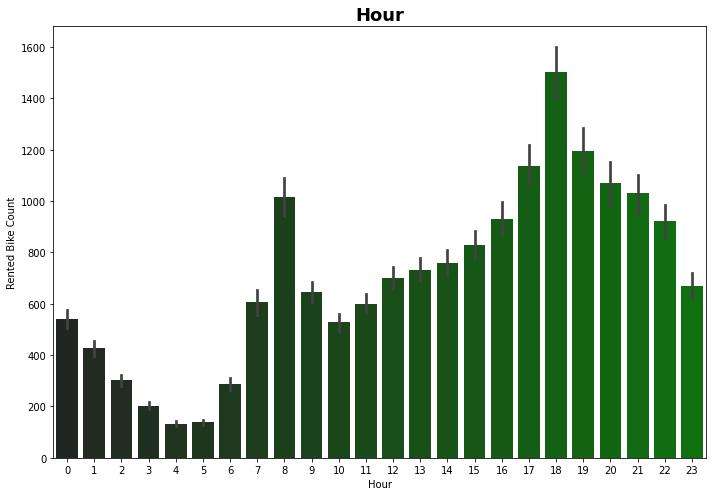

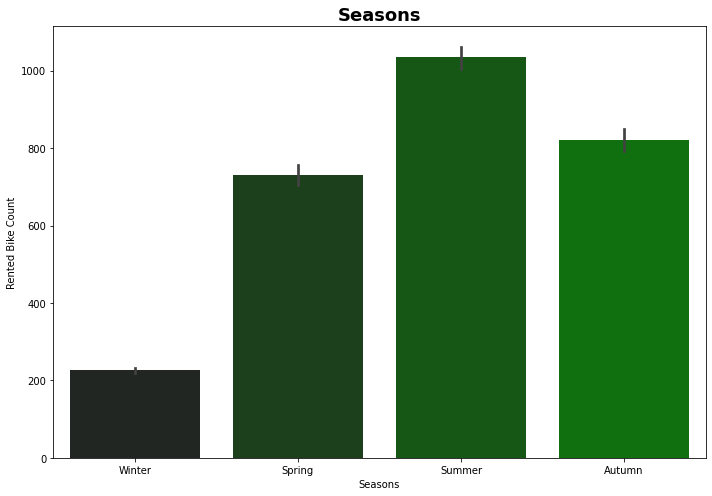

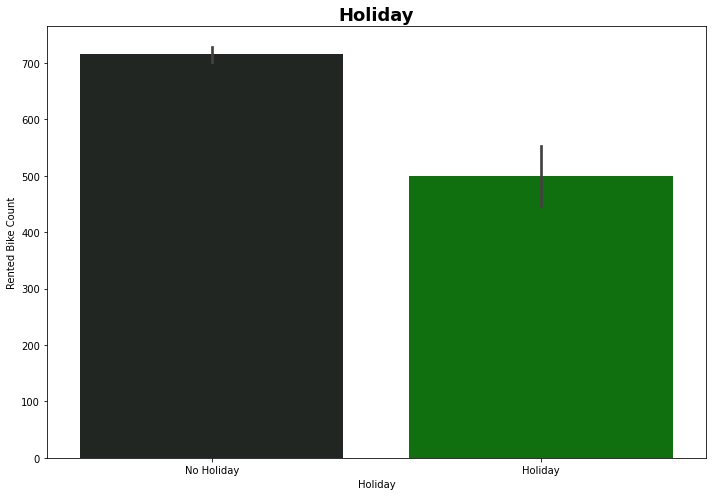

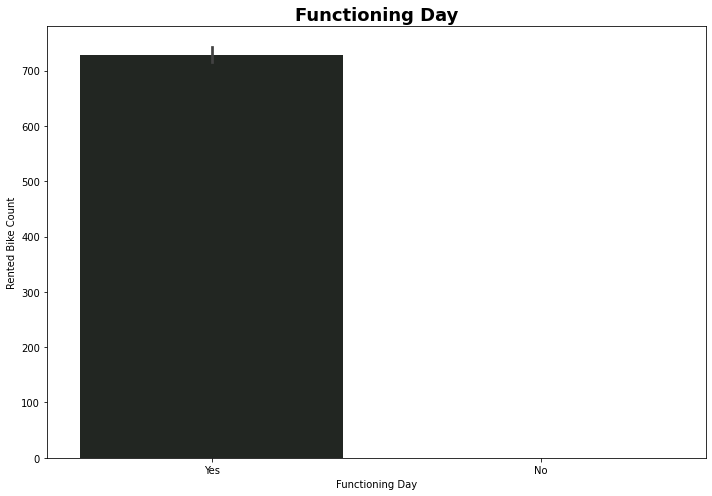

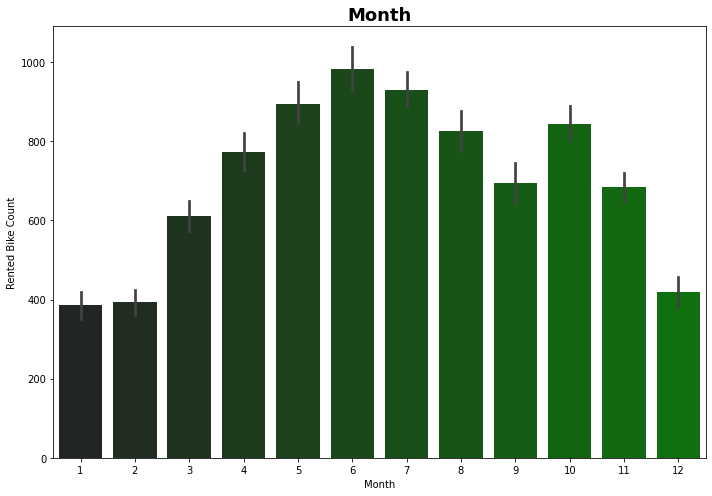

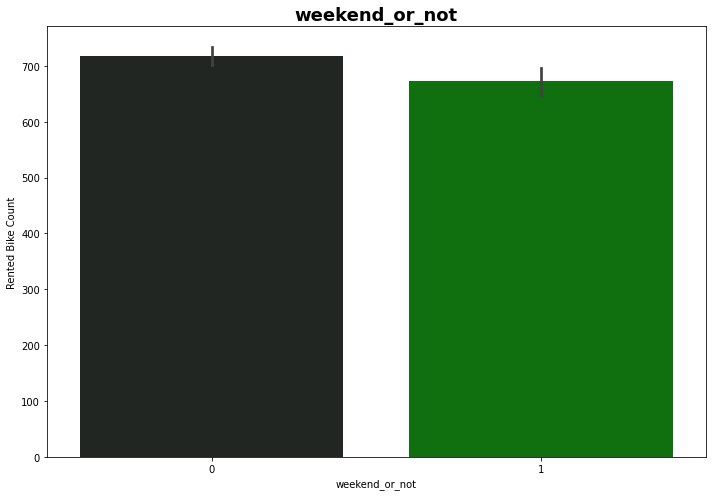

In [ ]:
# Creating bar plot for categorical columns value count -
for i in categorical_features.columns:
 plt.figure(figsize = (10,7))
 sns.barplot(df[i], df['Rented Bike Count'], palette = 'dark:Green').set_title( i, fontdict = { 'fontsize': 18},weight= 'bold')
 plt.tight_layout()

Why Bar Plot was chosen?

* Bar charts are to be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.A bar diagram makes it easy to compare sets of data between different groups at a glance. They are preferred over other plots because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.

Inferences:
1. In the above plots first one shows the use of rented bike in accordance with the hours.
2. From the first plot only we can infer that -in general people used rented bikes during their commuting hours i.e from 7am to 9am in morning and 5pm to 7pm in the evening.
3. People rent bikes most in Summer followed by Autumn and Spring. Winter has a very low bike rent count, it has a value 20% of that in the Summer season.
4. Rented Bike count for Non-holiday is about 40% more than that on holidays.
5. Rented bike count increases from January to June where it peaks then it goes down till September, rises in October and again drops till December.
6. There is a slight about 10%-15% difference in Rented bike count values on Weekdays and Weekends with Weekdays having a higher value.
7. Only on a Functioning day, bikes are rented.

Business Implications:

The gained insights can help in positively growing the business of rented bikes and cutting on factors leading to negative growth. For example:- Advertisement campaigns targeted to increase Rented bike count in summers can incline the business to grow positively.

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekend ')]

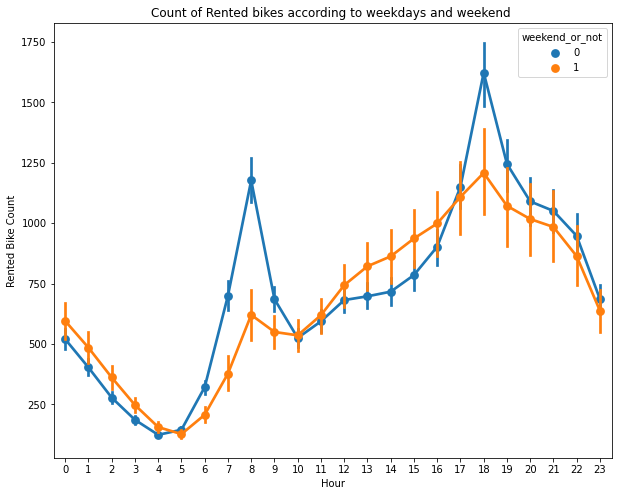

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekend_or_not',ax=ax)
ax.set(title='Count of Rented bikes according to weekdays and weekend ')

From the above plot we can see that in the weekdays demand of the bike is extremely low for 12am to 5am and decreases consistently. Then it Starts rising from 5am and reaches local maxima at 8am after that it decreases from that point till 11am. After that it again starts risingand reaches peak value at 7pm. After that it decreases from there onwards.
Weekend demand follows similar time pattern but the peak values are lower by 50% at 8am and 30% at 7pm.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

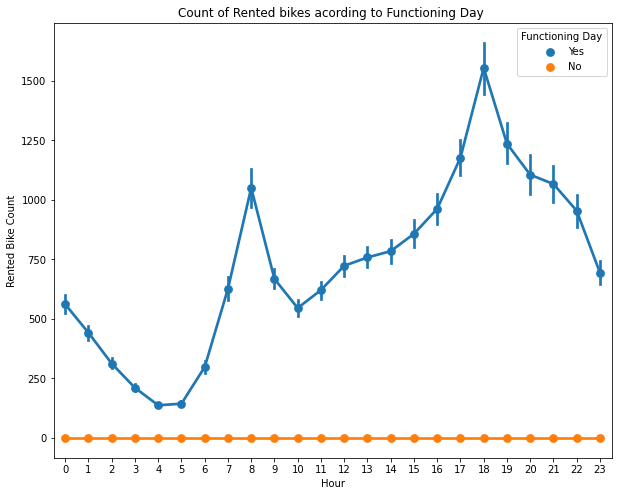

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')


Similar to the previous plot, the functioning day demand of the bike is extremely low for 12am to 5am and decreases consistently. Then it Starts rising from 5am and reaches local maxima at 8am after that it decreases from that point till 11am. After that it again starts risingand reaches peak value at 7pm. After that it decreases from there onwards.

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

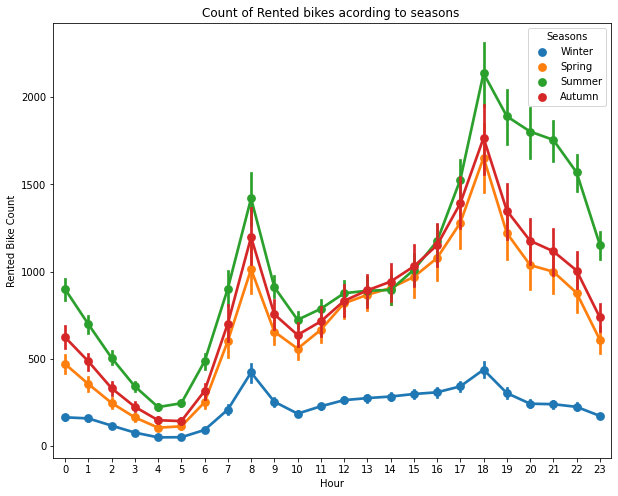

In [ ]:
#analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

Demand of the bike is extremely low for 12am to 5am and decreases consistently. Then it Starts rising from 5am and reaches local maxima at 8am after that it decreases from that point till 11am. After that it again starts risingand reaches peak value at 7pm. After that it decreases from there onwards.
Same time trend is followed for all four seasons. The peak values differ and is highest for Summer followed by Autumn and Spring. Winter has peak value of about 20% of peak value of Summer.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

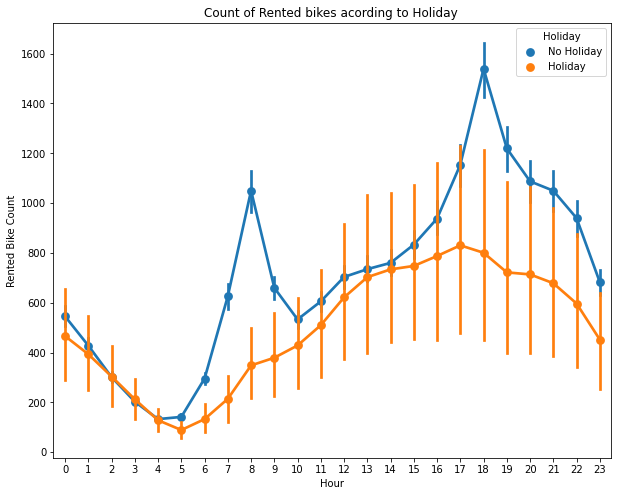

In [ ]:
#analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')


Time trend for no holiday is same as previous three plots. Time trend for holiday is a bit different. Demand decreases from 12am to 5am then rises steadily till 5pm and then again decreases from 5pm to 12am.

For the four pointplots above:

Why this type of plot was chosen?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable.

Inferences- Already written below each point plot.

Business Implications

Since time trends are known for variables (season, holiday, functioning day, weekday as per hour of the day) we can use this information to grow our business. Using this information alongwith customer feedback we can design promotions, offers etc. to increase customer satisfaction and customer reach which can lead to positive growth of business.